In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# Sparse Hebbian Learning: testing the tools in the package

This notebook aims at show-casing the different tools implemented in the package.


In [3]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 1, 1

In [4]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

In [5]:
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_width=9, N_patches=65536, datapath='../database/', name_database='kodakdb', do_mask=False, do_bandpass=True, over_patches=16, patch_ds=1, n_dictionary=144, learning_algorithm='mp', fit_tol=None, do_precision=True, l0_sparseness=13, one_over_F=True, n_iter=4097, eta=0.05, beta1=0.0, beta2=0.999, epsilon=1e-08, homeo_method='HAP', eta_homeo=0.02, alpha_homeo=0.08, C=3.0, nb_quant=128, P_cum=None, do_sym=False, seed=42, patch_norm=False, batch_size=1024, record_each=32, record_num_batches=1024, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, cache_dir='cache_dir')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_alg


## loading a database

Loading patches, with or without mask:

Extracting data..bittern62.png, Data is of shape : (12, 81) - done in 0.37s.


<Figure size 1080x216 with 0 Axes>

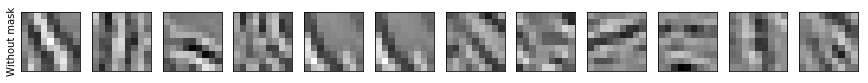

Extracting data..bittern62.png, Data is of shape : (12, 81) - done in 0.13s.


<Figure size 1080x216 with 0 Axes>

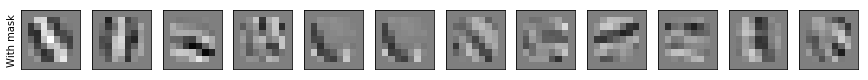

In [6]:
N_patches = 12
from shl_scripts.shl_tools import show_data

for i, (do_mask, label) in enumerate(zip([False, True], ['Without mask', 'With mask'])):
    data = SHL(DEBUG_DOWNSCALE=1, verbose=verbose, N_patches=N_patches, n_image=1, do_mask=do_mask).get_data()
    fig, axs = show_data(data)
    axs[0].set_ylabel(label)
    plt.show()

Extracting data..craterlake12.png, Data is of shape : (12, 81) - done in 0.10s.


<Figure size 1080x216 with 0 Axes>

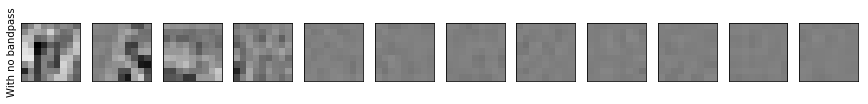

Extracting data..craterlake12.png, Data is of shape : (12, 81) - done in 0.12s.


<Figure size 1080x216 with 0 Axes>

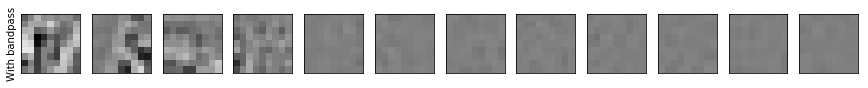

<Figure size 1080x216 with 0 Axes>

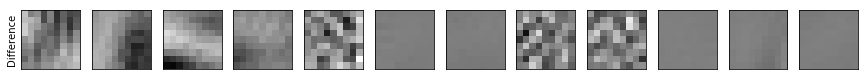

In [7]:
N_patches = 12
from shl_scripts.shl_tools import show_data
np.random.seed()
data_ = []
for i, (do_bandpass, label) in enumerate(zip([False, True], ['With no bandpass', 'With bandpass'])):
    data = SHL(seed=2018, verbose=verbose, N_patches=N_patches, n_image=1, do_bandpass=do_bandpass, over_patches=1).get_data()
    fig, axs = show_data(data)
    data_.append(data)
    axs[0].set_ylabel(label);
    plt.show()
fig, axs = show_data(data_[0]-data_[1])
axs[0].set_ylabel('Difference');
plt.show()    

Downscaling images to get a better signal to noise ratio:

<Figure size 1080x216 with 0 Axes>

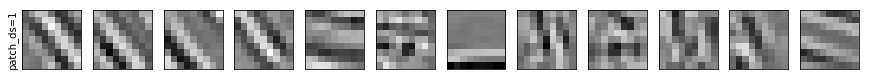

<Figure size 1080x216 with 0 Axes>

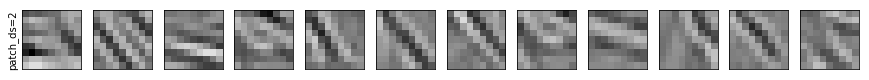

<Figure size 1080x216 with 0 Axes>

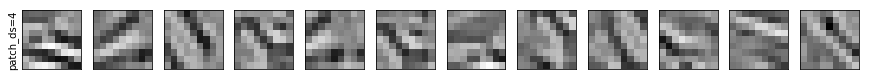

<Figure size 1080x216 with 0 Axes>

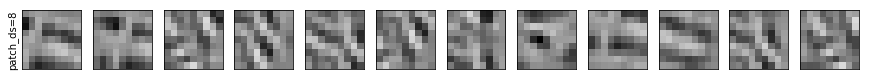

In [8]:
for i, patch_ds in enumerate(2**np.arange(4)):
    data = SHL(DEBUG_DOWNSCALE=1, verbose=0, height=480//patch_ds, width=480//patch_ds, N_patches=N_patches, n_image=1, patch_ds=patch_ds).get_data()
    fig, axs = show_data(data)
    axs[0].set_ylabel('patch_ds='+str(patch_ds))
    plt.show();

<Figure size 1080x216 with 0 Axes>

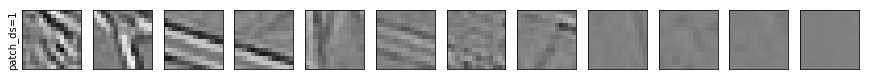

<Figure size 1080x216 with 0 Axes>

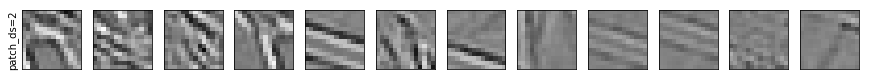

<Figure size 1080x216 with 0 Axes>

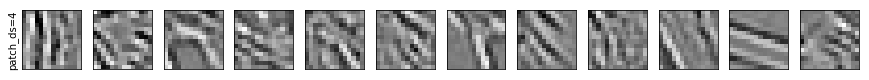

<Figure size 1080x216 with 0 Axes>

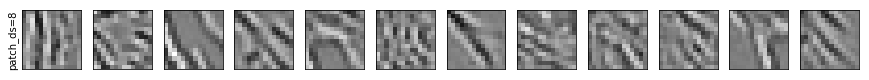

<Figure size 1080x216 with 0 Axes>

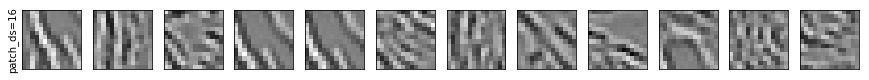

In [29]:
for i, over_patches in enumerate(2**np.arange(5)):
    data = SHL(DEBUG_DOWNSCALE=1, verbose=0, N_patches=N_patches, n_image=1, over_patches=over_patches).get_data()
    fig, axs = show_data(data)
    axs[0].set_ylabel('patch_ds='+str(over_patches));
    plt.show();

Saving to a file:

In [10]:
data = shl.get_data(matname=matname)

Extracting data..No cache found cache_dir/test_tools_data: Extracting data... Extracting data..bittern62.png, reflection63.png, yose07.png, rocky10.png, koala52.png, craterlake12.png, clouds43.png, yellowleaves39.png, yose05.png, goldwater67.png, bird08.png, cattails70.png, flowers37.png, woods54.png, cucorn50.png, bora04.png, geyser27.png, flowerhill29.png, calcoast09.png, hibiscus30.png, Data is of shape : (65520, 81) - done in 9.07s.
Data is of shape : (65520, 81) - done in 9.10s.



## initializing the dictionary


<Figure size 1080x216 with 0 Axes>

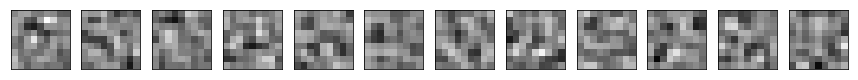

In [11]:
from shl_scripts.shl_tools import ovf_dictionary
data = ovf_dictionary(N_patches, n_pixels=shl.patch_width**2)
fig, axs = show_data(data);


## caching tools : loading a database


In [12]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

Let's first remove potential data cache:

In [13]:
!rm cache_dir/{matname}*

If the data cache does not exist (as a file), it creates it:

In [14]:
data = shl.get_data(matname=matname)

Extracting data..No cache found cache_dir/test_tools_data: Extracting data... Extracting data..bittern62.png, reflection63.png, yose07.png, rocky10.png, koala52.png, craterlake12.png, clouds43.png, yellowleaves39.png, yose05.png, goldwater67.png, bird08.png, cattails70.png, flowers37.png, woods54.png, cucorn50.png, bora04.png, geyser27.png, flowerhill29.png, calcoast09.png, hibiscus30.png, Data is of shape : (65520, 81) - done in 8.70s.
Data is of shape : (65520, 81) - done in 8.73s.


But if the data cache exists, it loads it:

In [15]:
data = shl.get_data(matname=matname)

Extracting data..loading the data called : cache_dir/test_tools_data
Data is of shape : (65520, 81) - done in 0.03s.



## caching tools : learning, then reloading the dictionary


If the dictionary does not exist (as a file), it learns it:

No cache found cache_dir/test_tools_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteration   1 /   129 (elapsed time:   0s,   0mn   0s)
Iteration  33 /   129 (elapsed time:   3s,   0mn   3s)
Iteration  65 /   129 (elapsed time:   6s,   0mn   6s)
Iteration  97 /   129 (elapsed time:  10s,   0mn  10s)
Iteration  129 /   129 (elapsed time:  13s,   0mn  13s)
done in 13.84s.


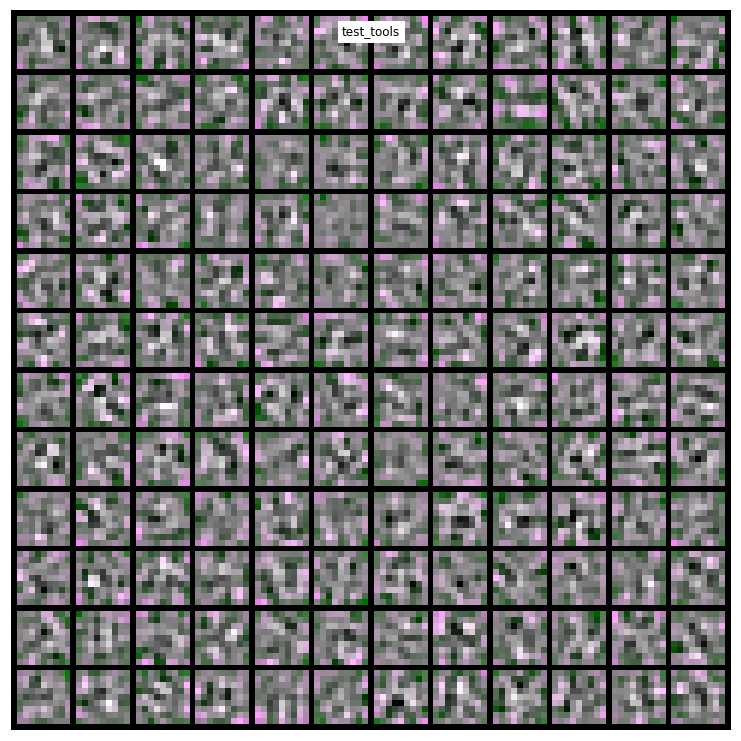

In [16]:
list_figures = ['show_dico']
shl.n_iter = 129
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

But if the dictionary exists, it loads it:

loading the dico called : cache_dir/test_tools_dico.pkl


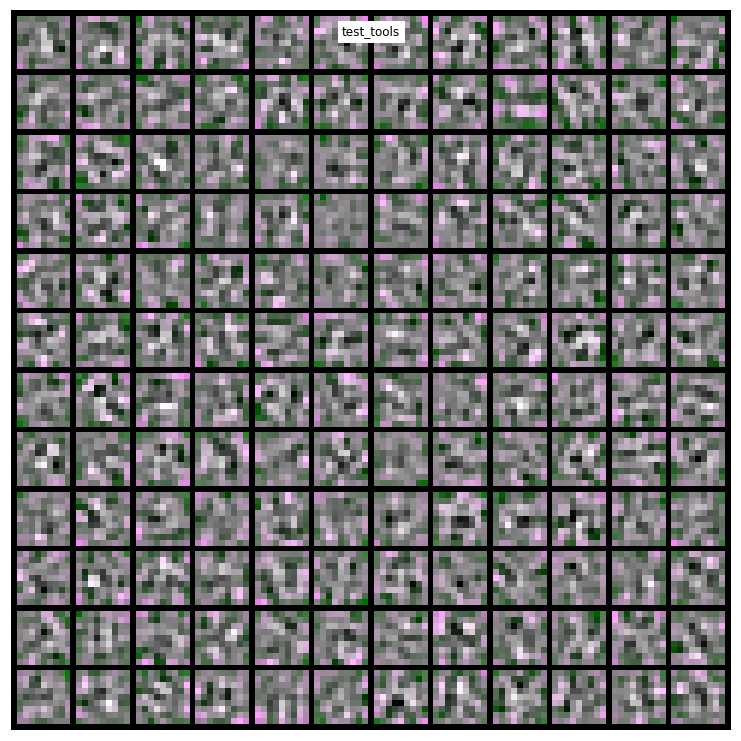

In [17]:
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)


## caching tools : resuming a learning

If we give a dictionary as an argument to the learning method, then we resume the learning from this dictionary and overwrite the data cache.


loading the dico called : cache_dir/test_tools_dico.pkl
resuming the learning on : cache_dir/test_tools_dico.pkl
Training on 65520 patches
[dict_learning] Iteration   1 /   129 (elapsed time:   0s,   0mn   0s)
Iteration  33 /   129 (elapsed time:   3s,   0mn   3s)
Iteration  65 /   129 (elapsed time:   6s,   0mn   6s)
Iteration  97 /   129 (elapsed time:   9s,   0mn   9s)
Iteration  129 /   129 (elapsed time:  13s,   0mn  13s)
done in 13.21s.


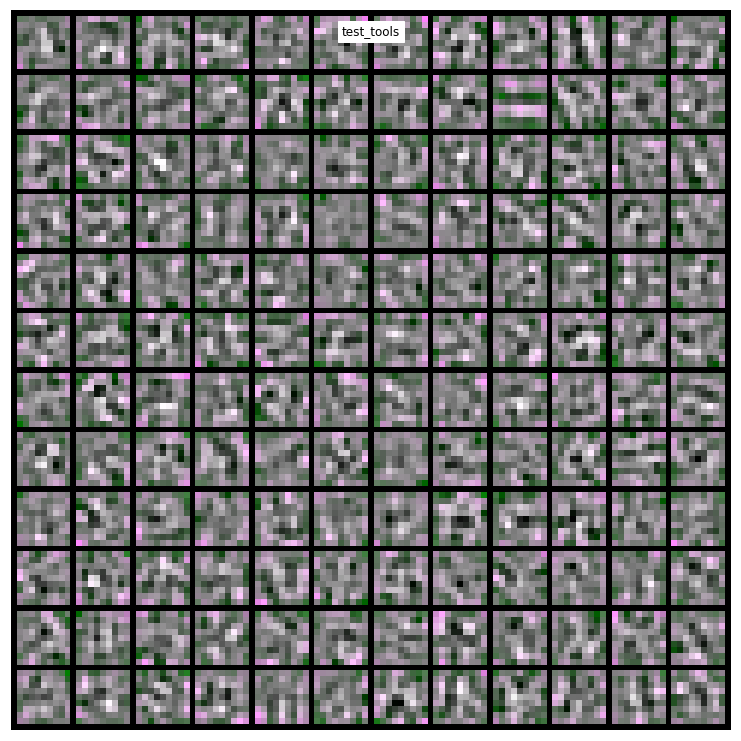

In [18]:
dico = shl.learn_dico(data=data, matname=matname, dictionary=dico.dictionary, list_figures=list_figures)


## caching tools : coding


In [19]:
%%time
sparse_code = shl.code(data, dico)

Coding data with algorithm  mp CPU times: user 3.44 s, sys: 2.92 s, total: 6.36 s
Wall time: 3.51 s


In [20]:
sparse_code = shl.code(data, dico, matname=matname)

No cache found cache_dir/test_tools_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp 

## plotting tools

The simplest solution is to pass a list of figures to the learning method:

In [21]:
df_variable = dico.record['kurt']

In [22]:
df_variable.ndim

1

Extracting data..loading the data called : cache_dir/test_tools_data
Data is of shape : (65520, 81) - done in 0.02s.
loading the dico called : cache_dir/test_tools_dico.pkl


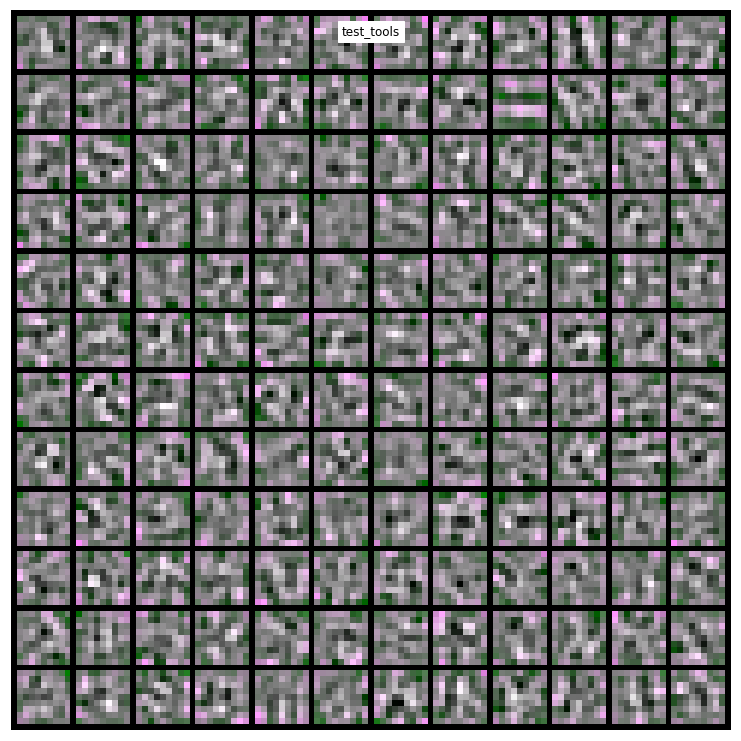

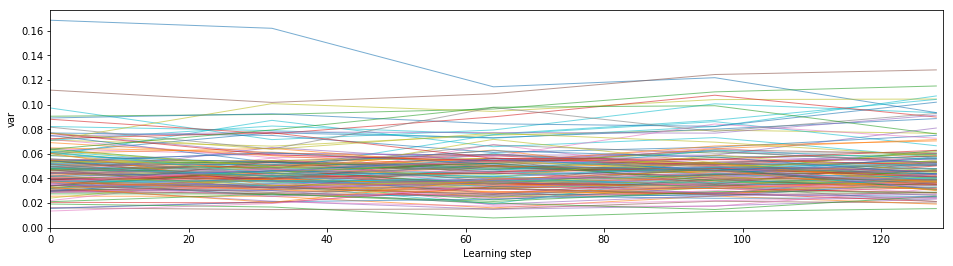

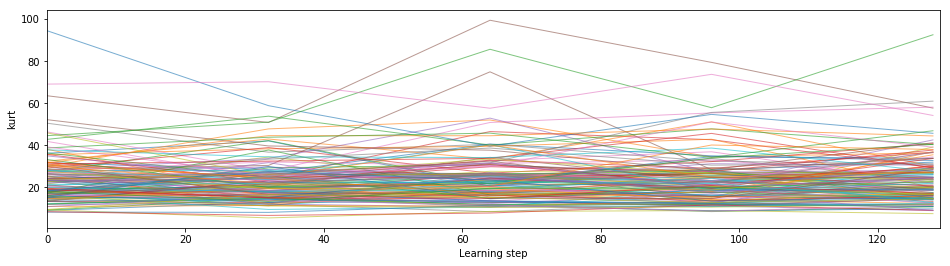

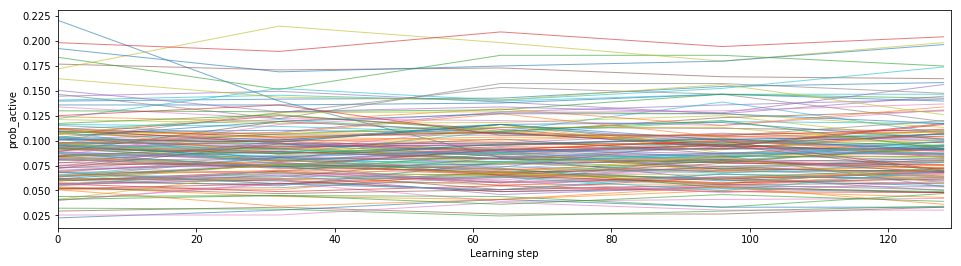

In [23]:
list_figures = ['show_dico',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(matname=matname, list_figures=list_figures)

But one can also generate every single figure independently:

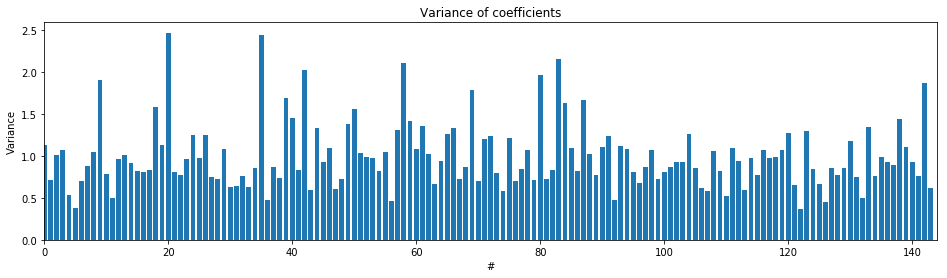

In [24]:
shl.plot_variance(sparse_code);

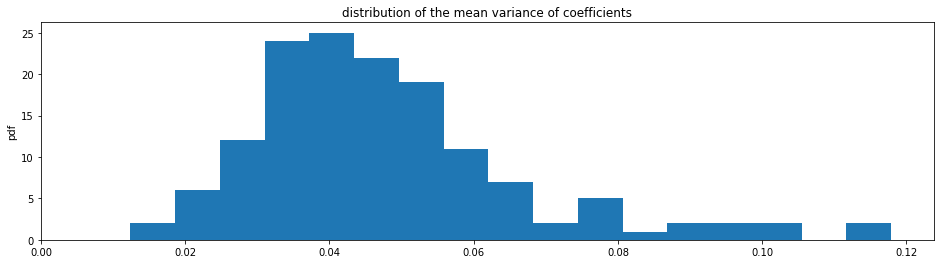

In [25]:
shl.plot_variance_histogram(sparse_code);

Training on 65520 patches
[dict_learning] Iteration   1 /   129 (elapsed time:   0s,   0mn   0s)
Iteration  33 /   129 (elapsed time:   3s,   0mn   3s)
Iteration  65 /   129 (elapsed time:   6s,   0mn   6s)
Iteration  97 /   129 (elapsed time:   9s,   0mn   9s)
Iteration  129 /   129 (elapsed time:  13s,   0mn  13s)
done in 13.32s.


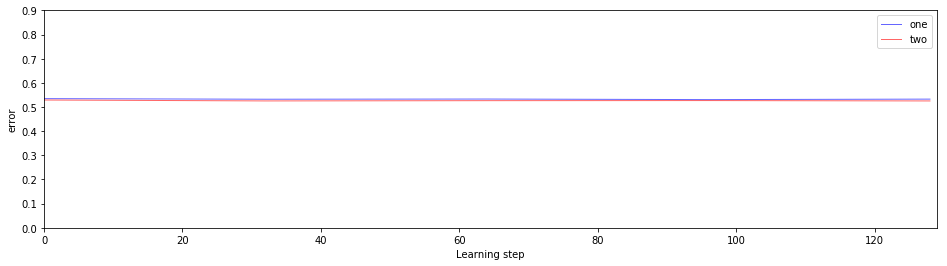

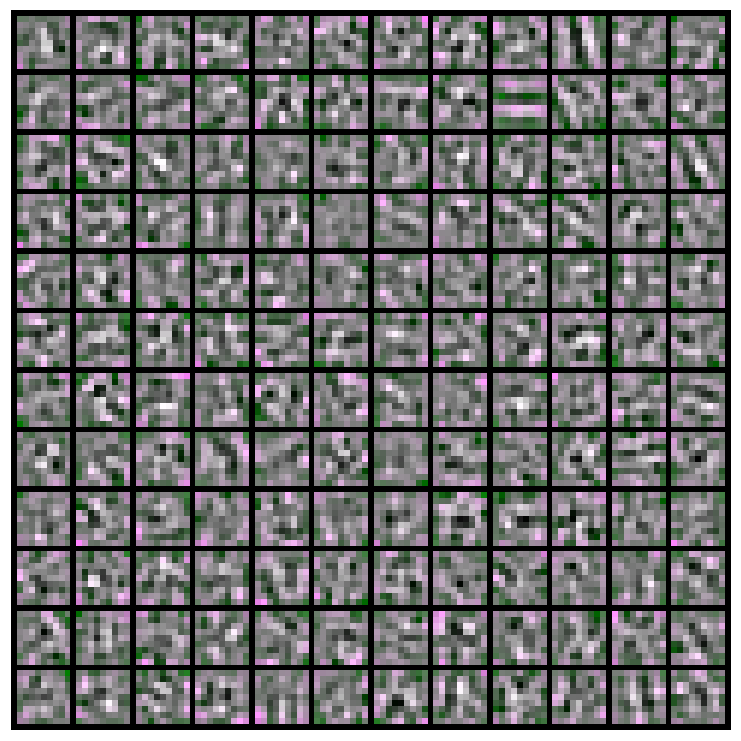

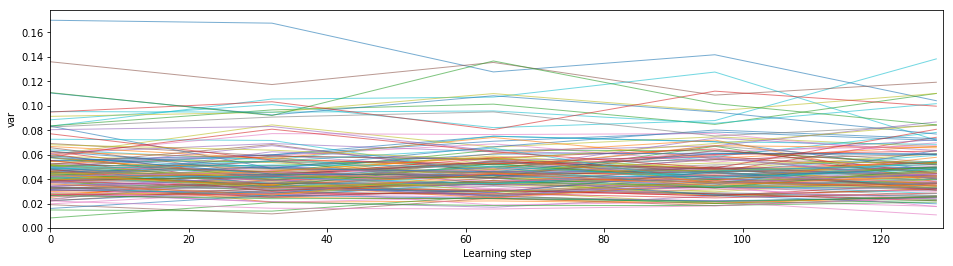

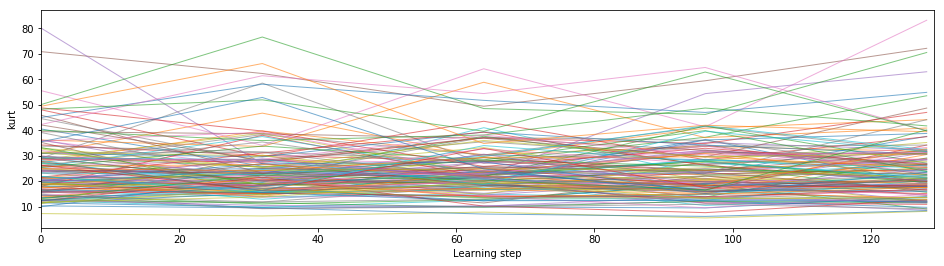

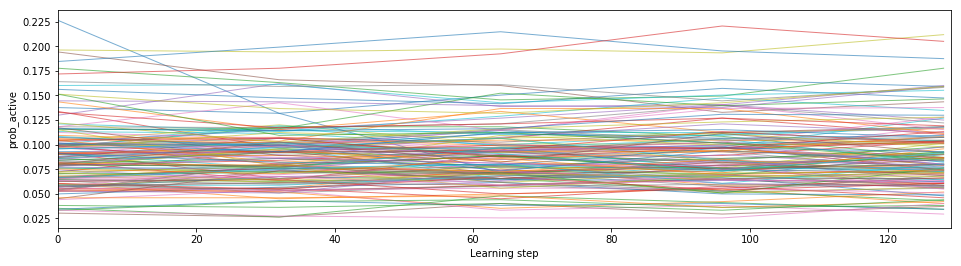

In [26]:
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico, variable='error', fig=fig_error, ax=ax_error, color='blue', label='one');
dico = shl.learn_dico(data=data, dictionary=dico.dictionary, matname=None, list_figures=list_figures)
fig_error, ax_error = shl.time_plot(dico, variable='error', fig=fig_error, ax=ax_error, color='red', label='two');
ax_error.set_ylim(0, .9)
ax_error.legend(loc='best');

And combine them:

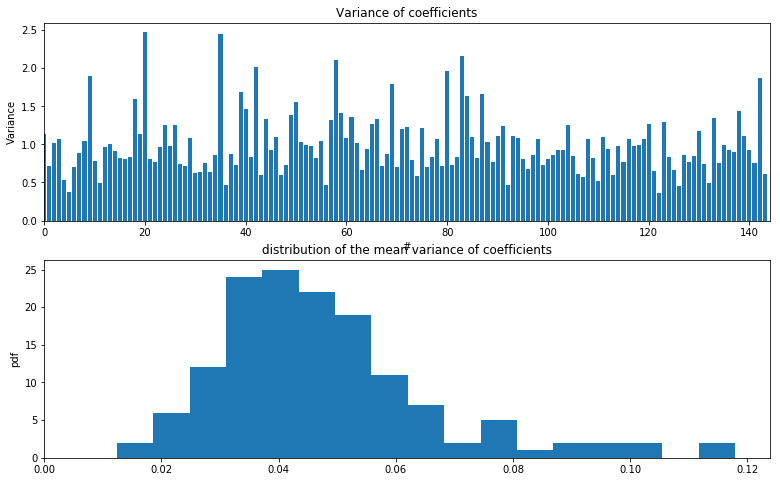

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(13, 8))
fig, axs[0] = shl.plot_variance(sparse_code, fig=fig, ax=axs[0])
fig, axs[1] = shl.plot_variance_histogram(sparse_code, fig=fig, ax=axs[1])

## Version used

In [28]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Wed Sep 12 16:17:06 2018 CEST